Project 1 Tianyuan Nan 606070866 Ruixuan Shen 105543906 Shijie Zhou 205429627

# Getting familiar with the dataset

In [226]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/ECE219/Project1'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ECE219/Project1


In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Q1

In [228]:
dataset = pd.read_csv("Project1-Classification.csv")
print (dataset.shape)
rows = dataset.shape[0]
columns = dataset.shape[1]

(3150, 8)


In [229]:
dataset

full_text  \
0     'Pure Hockey, the largest hockey retailer in t...   
1     'HKO Hockey Canada Sponsorship 20221006\n\nHoc...   
2     'Canadian Prime Minister Justin Trudeau said W...   
3     'Hockey Canada paid a crisis communications fi...   
4     'The Denver Broncos are looking for a new head...   
...                                                 ...   
3145  'By Rachel Premack of FreightWaves\n\nYou prob...   
3146  'Manufacturing had a big summer. The CHIPS and...   
3147  'A golf cart on a path at Verrado, an 8,800-ac...   
3148  'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...   
3149  'By Nora Buli\n\nOSLO (Reuters) – Norway’s dep...   

                                                summary  \
0     'Pure Hockey, the largest hockey retailer in t...   
1     'The tally of Hockey Canada’s sponsorship loss...   
2     'Canadian Prime Minister Justin Trudeau said W...   
3     'Nicholson says that Hockey Canada did not go ...   
4     'The Denver Broncos are looking for a new head...   
...                                                 ...   
3145  'Right now the barge industry — and all of us ...   
3146  'To address these issues and drive the transit...   
3147  'Water flow has dropped precipitously in the C...   
3148  'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...   
3149  'By Nora BuliOSLO (Reuters) – Norway’s deplete...   

                                               keywords  \
0     ['acquire', 'agrees', 'nevada', 'retail', 'hoc...   
1     ['sexual', 'exclusive', 'settlement', 'million...   
2     ['québec', 'surprise', 'trust', 'sexual', 'org...   
3     ['sexual', 'organization', 'million', 'ceo', '...   
4     ['beats', 'force', 'season', 'teams', 'anchora...   
...                                                 ...   
3145  ['coal', 'traffic', 'right', 'mississippi', 's...   
3146  ['manufacturing', 'system', 'future', 'technol...   
3147  ['developers', 'live', 'state', 'development',...   
3148  ['rohingyas', 'told', 'indonesia', 'refugees',...   
3149  ['outlook', 'low', 'efforts', 'normal', 'level...   

                   publish_date  \
0     2022-10-21 17:11:22+00:00   
1                           NaN   
2           2022-10-05 00:00:00   
3           2022-11-15 00:00:00   
4                           NaN   
...                         ...   
3145                        NaN   
3146                        NaN   
3147                        NaN   
3148                        NaN   
3149        2022-10-26 00:00:00   

                                                authors  \
0                                          ['Ein News']   
1                                   ['Barbara Shecter']   
2                                ['The Athletic Staff']   
3                                        ['Dan Robson']   
4     ['Parker Seibold', 'The Gazette', 'Gazette File']   
...                                                 ...   
3145                                   ['Tyler Durden']   
3146                            ['Mary Beth Gallagher']   
3147                                ['Keith Schneider']   
3148                             ['Online News Editor']   
3149                             ['Syndicated Content']   

                                                    url leaf_label root_label  
0     https://www.einnews.com/pr_news/597148062/pure...     hockey     sports  
1     https://ca.finance.yahoo.com/news/exclusive-ho...     hockey     sports  
2     https://theathletic.com/3659888/2022/10/05/hoc...     hockey     sports  
3     https://theathletic.com/3900630/2022/11/15/hoc...     hockey     sports  
4     https://gazette.com/multimedia/photo-air-force...     hockey     sports  
...                                                 ...        ...        ...  
3145  https://www.zerohedge.com/markets/latest-suppl...    drought    climate  
3146  https://news.mit.edu/2022/manufacturing-cleane...    drought    climate  
3147  https://news.yahoo.com/thousands-live-one-day-...    drought   

In [230]:
f_text = dataset['full_text']
count_list = np.zeros(f_text.shape[0],dtype=int)

for i in range(f_text.shape[0]):
    for x in f_text[i]:
        if x.isdigit() or x.isalpha():
            count_list[i]+=1

print(count_list)

[2162 4898 4071 ... 6936 1517 1736]


#### Histogram (a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis

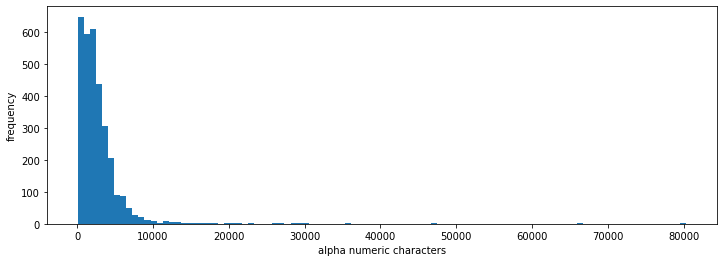

In [231]:
plt.figure(figsize=(12,4))
plt.hist(count_list,100)
plt.xlabel('alpha numeric characters')
plt.ylabel('frequency')
plt.savefig('q1(a).pdf')

#### Histogram(b) The column leaf label – class on the x-axis; 

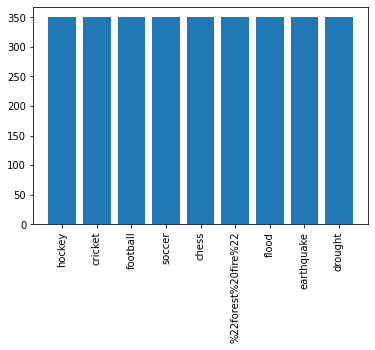

In [232]:
import collections

leaflabel = dataset['leaf_label']
rootlabel = dataset['root_label']

rst = collections.defaultdict(int)
for _, row in dataset.iterrows():
  category = row["leaf_label"]
  rst[category] += 1
counts = [item[1] for item in list(rst.items())]
plt.figure()
plt.bar(range(len(rst.keys())), counts)
plt.xticks(range(len(rst)), rst.keys(), rotation=90)
plt.savefig('q1(b).pdf')
plt.show()

In [233]:
leaflabel_dict = {}
for i in range(leaflabel.shape[0]):
    if leaflabel[i] in leaflabel_dict:
        leaflabel_dict[leaflabel[i]]+=1
    else:
        leaflabel_dict[leaflabel[i]] = 1

print(leaflabel_dict)

{'hockey': 350, 'cricket': 350, 'football': 350, 'soccer': 350, 'chess': 350, '%22forest%20fire%22': 350, 'flood': 350, 'earthquake': 350, 'drought': 350}


#### Histogram (c) The column root label – class on the x-axis.


In [234]:
rootlabel_dict = {}
for i in range(rootlabel.shape[0]):
    if rootlabel[i] in rootlabel_dict:
        rootlabel_dict[rootlabel[i]]+=1
    else:
       rootlabel_dict[rootlabel[i]] = 1

print(rootlabel_dict)

{'sports': 1750, 'climate': 1400}


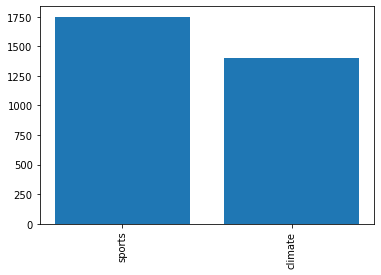

In [235]:
rst = collections.defaultdict(int)
for _, row in dataset.iterrows():
  category = row["root_label"]
  rst[category] += 1
counts = [item[1] for item in list(rst.items())]
plt.figure()
plt.bar(range(len(rst.keys())), counts)
plt.xticks(range(len(rst)), rst.keys(), rotation=90)
plt.savefig('q1(c).pdf')
plt.show()

# Binary Classification


### 1. Splitting the entire dataset into training and testing data

## Q2

In [236]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [237]:
from sklearn.model_selection import train_test_split
df = dataset
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)
print('number of training sample:', train.shape[0])
print('number of testing sample:', test.shape[0])

number of training sample: 2520
number of testing sample: 630


### Feature Extraction

In [238]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter


In [239]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Q3

In [240]:
# Clean training set and testing set 
sentences_train = []
for text in train['full_text']:
    sentences_train.append(clean(text))


sentences_test = []
for text in test['full_text']:
    sentences_test.append(clean(text))



vectorizer = CountVectorizer(min_df=3)
X = vectorizer.fit_transform(sentences_train)
X

<2520x18216 sparse matrix of type '<class 'numpy.int64'>'
	with 589483 stored elements in Compressed Sparse Row format>

In [241]:
# Lemmatization 
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
wnet = nltk.wordnet.WordNetLemmatizer()
words_list = len(sentences_train)*['']
for i in range(len(sentences_train)):
    for item in sentences_train[i].split():
        if not item.isnumeric(): # exclude numbers
            words_list[i] = words_list[i] + ' ' + wnet.lemmatize(item)

print(len(words_list))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2520


In [242]:
# stopwords
count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(words_list)





In [243]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


### without lemmatization, stemming

In [244]:

count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(sentences_train)
X_train_counts.shape

(2520, 17922)

In [245]:
X_test_counts = count_vect.transform(sentences_test)
X_test_counts.shape

(630, 17922)

In [246]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print(X_train_tfidf.shape)

(2520, 17922)


### Stemming

In [247]:
import nltk
ps = nltk.stem.PorterStemmer()
words = len(sentences_train)*['']
for i in range(len(sentences_train)):
    for item in sentences_train[i].split():
        words[i] = words[i] + ' ' + ps.stem(item)

In [248]:
count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(words)
X_train_counts.shape

(2520, 15554)

In [249]:
X_test_counts = count_vect.transform(sentences_test)
X_test_counts.shape

(630, 15554)

In [250]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(2520, 15554)
(630, 15554)


In [251]:
print('TF-IDF processed train data shape:', X_train_tfidf.shape)
print('TF-IDF processed test data shape:', X_test_tfidf.shape)

TF-IDF processed train data shape: (2520, 15554)
TF-IDF processed test data shape: (630, 15554)


#### Dimensionality Reduction

##Q4


In [252]:
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

In [253]:
Ks = [1,10,50,100,200,500,1000,2000]
Explained_ratio = []
for ratio in Ks:
    Lsi_temp = TruncatedSVD(n_components=ratio)
    Lsi_temp.fit(X_train_tfidf)
    Explained_ratio.append(Lsi_temp.explained_variance_ratio_.sum())

In [254]:
K= 50 
Lsi = TruncatedSVD(n_components=50)
Lsi.fit(X_train_tfidf)
X_train_Lsi = Lsi.fit_transform(X_train_tfidf)
X_test_Lsi = Lsi.transform(X_test_tfidf)

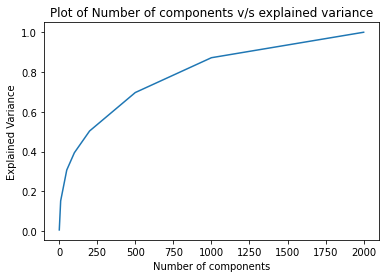

In [255]:
plt.plot(Ks, Explained_ratio)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.savefig('q4.jpg')
plt.show()

In [256]:
nmf = NMF(n_components=50, init='random', random_state=42, max_iter=500)
nmf_train = nmf.fit_transform(X_train_tfidf)
nmf_test = nmf.transform(X_test_tfidf)
WH = np.dot(nmf_train, nmf.components_)
nmf_mse =np.sum(np.square(WH-X_train_tfidf))
print("MSE Error of NMF: " + str(nmf_mse))

u,sigma,vt = randomized_svd(X_train_tfidf,n_components=50,random_state=42)
x_50 = np.dot(np.dot(u,np.diag(sigma)),vt)
Lsi_mse = np.sum(np.square(x_50 - X_train_tfidf))
print("MSE Error of LSI: " + str(Lsi_mse))

MSE Error of NMF: 1711.709536478663
MSE Error of LSI: 1685.3592296605452


#### Classification Algorithms

##Q5

In [257]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [258]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [259]:
y_train = []
y_test = []
for label in train['root_label']:
    if label == 'sports':
        y_train.append(0)
    else:
        y_train.append(1)
for label in test['root_label']:
    if label == 'sports':
        y_test.append(0)
    else:
        y_test.append(1)

In [260]:
hardSVM = svm.SVC(kernel='linear',C=1000,random_state=42)
hardSVM.fit(X_train_Lsi, y_train)
P_Hard = hardSVM.predict(X_test_Lsi)

softSVM = svm.SVC(kernel='linear',C=0.0001,random_state=42)
softSVM.fit(X_train_Lsi, y_train)
P_Soft =softSVM.predict(X_test_Lsi)

In [261]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

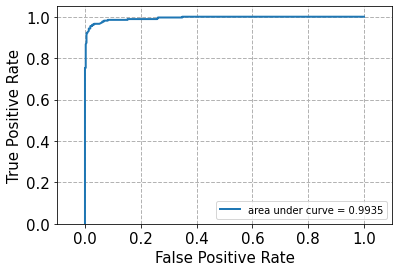

In [267]:
fpr, tpr, _ = roc_curve(y_test, hardSVM.decision_function(X_test_Lsi))
plot_roc(fpr,tpr)

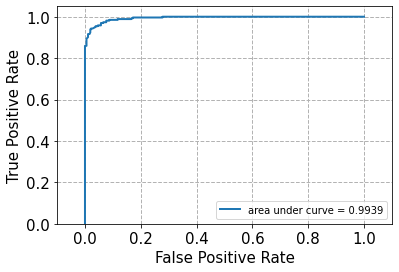

In [268]:
fpr, tpr, _ = roc_curve(y_test, softSVM.decision_function(X_test_Lsi))
plot_roc(fpr,tpr)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


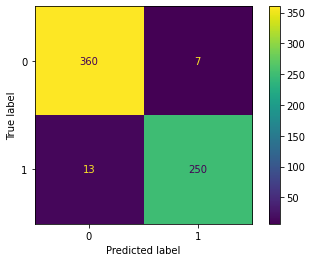

In [269]:
plot_confusion_matrix(hardSVM, X_test_Lsi, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


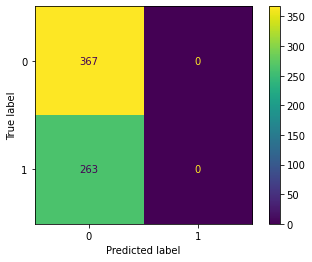

In [270]:
plot_confusion_matrix(softSVM, X_test_Lsi, y_test)

In [271]:
print("For hard SVM:")
print("Accuracy: ", accuracy_score(y_test,P_Hard))
print("Recall: ", recall_score(y_test,P_Hard))
print("Precision: ", precision_score(y_test,P_Hard))
print("F1-Score: ", f1_score(y_test,P_Hard))

print('-' * 50)
print("For soft SVM:")
print("Accuracy: ", accuracy_score(y_test,P_Soft))
print("Recall: ", recall_score(y_test,P_Soft))
print("Precision: ", precision_score(y_test,P_Soft))
print("F1-Score: ", f1_score(y_test,P_Soft))

For hard SVM:
Accuracy:  0.9682539682539683
Recall:  0.9505703422053232
Precision:  0.9727626459143969
F1-Score:  0.9615384615384615
--------------------------------------------------
For soft SVM:
Accuracy:  0.5825396825396826
Recall:  0.0
Precision:  0.0
F1-Score:  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### C =100000

In [272]:
hardSVM = svm.SVC(kernel='linear',C=100000,random_state=42)
hardSVM.fit(X_train_Lsi, y_train)
P_Hard = hardSVM.predict(X_test_Lsi)

softSVM = svm.SVC(kernel='linear',C=0.0001,random_state=42)
softSVM.fit(X_train_Lsi, y_train)
P_Soft =softSVM.predict(X_test_Lsi)

print("For hard SVM with C = 100000:")
print("Accuracy: ", accuracy_score(y_test,P_Hard))
print("Recall: ", recall_score(y_test,P_Hard))
print("Precision: ", precision_score(y_test,P_Hard))
print("F1-Score: ", f1_score(y_test,P_Hard))

print('-' * 50)
print("For soft SVM:")
print("Accuracy: ", accuracy_score(y_test,P_Soft))
print("Recall: ", recall_score(y_test,P_Soft))
print("Precision: ", precision_score(y_test,P_Soft))
print("F1-Score: ", f1_score(y_test,P_Soft))

For hard SVM with C = 100000:
Accuracy:  0.9698412698412698
Recall:  0.9543726235741445
Precision:  0.9728682170542635
F1-Score:  0.963531669865643
--------------------------------------------------
For soft SVM:
Accuracy:  0.5825396825396826
Recall:  0.0
Precision:  0.0
F1-Score:  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Cross-validation

In [273]:
Cross_Val = svm.SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}
grid = GridSearchCV(Cross_Val,param_grid)
grid.fit(X_train_Lsi,y_train)
pred_cv = grid.best_estimator_.predict(X_test_Lsi)
print("Best parameter (CV score=%0.3f):" % grid.best_score_) 

Best parameter (CV score=0.955):


In [274]:
print('Best Value of gamma:',grid.best_params_) 
for i in range(len(param_grid['C'])):
    print('Gamma: %s\t, Avg. Validation Accuracy: %s' %(param_grid['C'][i],grid.cv_results_['mean_test_score'][i]))



Best Value of gamma: {'C': 10}
Gamma: 0.001	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.01	, Avg. Validation Accuracy: 0.7944444444444445
Gamma: 0.1	, Avg. Validation Accuracy: 0.9353174603174603
Gamma: 1	, Avg. Validation Accuracy: 0.9511904761904763
Gamma: 10	, Avg. Validation Accuracy: 0.9547619047619047
Gamma: 100	, Avg. Validation Accuracy: 0.9539682539682539
Gamma: 1000	, Avg. Validation Accuracy: 0.9496031746031746
Gamma: 10000	, Avg. Validation Accuracy: 0.9488095238095238
Gamma: 100000	, Avg. Validation Accuracy: 0.9488095238095238
Gamma: 1000000	, Avg. Validation Accuracy: 0.9488095238095238


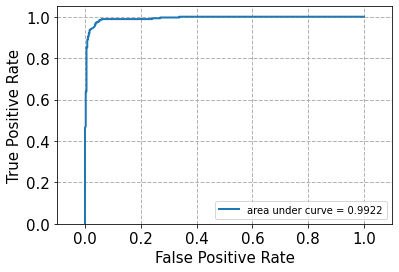

In [275]:
fpr, tpr, _ = roc_curve(y_test, grid.best_estimator_.decision_function(X_test_Lsi))
plot_roc(fpr,tpr)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


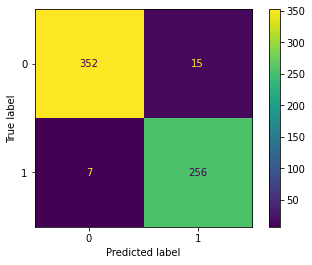

In [276]:
P_cv = Cross_Val.fit(X_train_Lsi, y_train).predict(X_test_Lsi)
plot_confusion_matrix(grid.best_estimator_, X_test_Lsi, y_test)

In [277]:
print("Accuracy: ", accuracy_score(y_test,P_cv))
print("Recall: ", recall_score(y_test,P_cv))
print("Precision: " , precision_score(y_test,P_cv))
print("F1-Score: " , f1_score(y_test,P_cv))

Accuracy:  0.9619047619047619
Recall:  0.9695817490494296
Precision:  0.940959409594096
F1-Score:  0.9550561797752808


#### Logistic

##Q6


##### 1. Without regulation

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


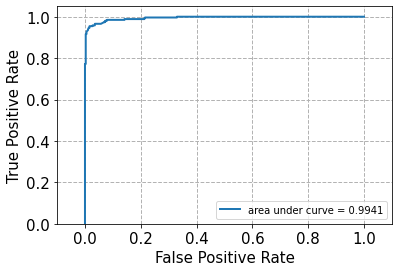

In [278]:
logistic_no_rgl = LogisticRegression(C=10000000) # smaller C values specify stronger regularization
logistic_no_rgl.fit(X_train_Lsi,y_train)
P_logi = logistic_no_rgl.predict(X_test_Lsi)

fpr, tpr, _ = roc_curve(y_test, logistic_no_rgl.decision_function(X_test_Lsi))
plot_roc(fpr,tpr)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9698412698412698
Recall:  0.9543726235741445
Precision:  0.9728682170542635
F1-Score:  0.963531669865643


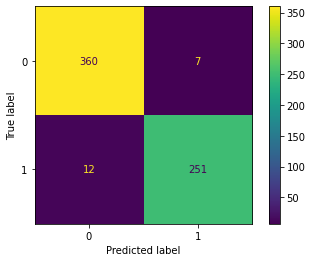

In [279]:
plot_confusion_matrix(logistic_no_rgl, X_test_Lsi, y_test)

print("Accuracy: ", accuracy_score(y_test,P_logi))
print("Recall: ", recall_score(y_test,P_logi))
print("Precision: " , precision_score(y_test,P_logi))
print("F1-Score: " , f1_score(y_test,P_logi))

#### L1 logistic regression


In [280]:
logistic_l1 = LogisticRegression(penalty='l1',random_state=42,solver='liblinear')
param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
grid_l1 = GridSearchCV(logistic_l1,param_grid,scoring='accuracy')
grid_l1.fit(X_train_Lsi,y_train)
P_logi_l1 = grid_l1.best_estimator_.predict(X_test_Lsi)

In [281]:
print("L1 logistic regression:")
print('Best Value of gamma:',grid_l1.best_params_) 
print('-'*50)
for i in range(len(param_grid['C'])):
    print('Gamma: %s\t, Avg. Validation Accuracy: %s' %(param_grid['C'][i],grid_l1.cv_results_['mean_test_score'][i]))

L1 logistic regression:
Best Value of gamma: {'C': 1000}
--------------------------------------------------
Gamma: 1e-05	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.0001	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.001	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.01	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.1	, Avg. Validation Accuracy: 0.9261904761904762
Gamma: 1	, Avg. Validation Accuracy: 0.9384920634920636
Gamma: 10	, Avg. Validation Accuracy: 0.9480158730158731
Gamma: 100	, Avg. Validation Accuracy: 0.9484126984126984
Gamma: 1000	, Avg. Validation Accuracy: 0.9492063492063492
Gamma: 10000	, Avg. Validation Accuracy: 0.9492063492063492
Gamma: 100000	, Avg. Validation Accuracy: 0.9492063492063492


In [282]:
print("Accuracy: ", accuracy_score(y_test,P_logi_l1))
print("Recall: ", recall_score(y_test,P_logi_l1))
print("Precision: " , precision_score(y_test,P_logi_l1))
print("F1-Score: " , f1_score(y_test,P_logi_l1))

Accuracy:  0.9666666666666667
Recall:  0.9543726235741445
Precision:  0.9653846153846154
F1-Score:  0.9598470363288719


#### L2 logistic regression


In [283]:
logistic_l2 = LogisticRegression(penalty='l2',random_state=42,solver='liblinear')
param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
grid_l2 = GridSearchCV(logistic_l2,param_grid,scoring='accuracy')
grid_l2.fit(X_train_Lsi,y_train)
P_logi_l2 = grid_l2.best_estimator_.predict(X_test_Lsi)

In [284]:
print("L2 logistic regression:")
print('Best Value of gamma:',grid_l2.best_params_) 
print('-'*50)
for i in range(len(param_grid['C'])):
    print('Gamma: %s\t, Avg. Validation Accuracy: %s' %(param_grid['C'][i],grid_l2.cv_results_['mean_test_score'][i]))

L2 logistic regression:
Best Value of gamma: {'C': 10000}
--------------------------------------------------
Gamma: 1e-05	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.0001	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.001	, Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.01	, Avg. Validation Accuracy: 0.7174603174603175
Gamma: 0.1	, Avg. Validation Accuracy: 0.9242063492063493
Gamma: 1	, Avg. Validation Accuracy: 0.9408730158730159
Gamma: 10	, Avg. Validation Accuracy: 0.9456349206349206
Gamma: 100	, Avg. Validation Accuracy: 0.9468253968253968
Gamma: 1000	, Avg. Validation Accuracy: 0.9484126984126984
Gamma: 10000	, Avg. Validation Accuracy: 0.9492063492063492
Gamma: 100000	, Avg. Validation Accuracy: 0.9492063492063492


In [285]:
print("Accuracy: ", accuracy_score(y_test,P_logi_l2))
print("Recall: ", recall_score(y_test,P_logi_l2))
print("Precision: " , precision_score(y_test,P_logi_l2))
print("F1-Score: " , f1_score(y_test,P_logi_l2))

Accuracy:  0.9666666666666667
Recall:  0.9543726235741445
Precision:  0.9653846153846154
F1-Score:  0.9598470363288719


#### Naive Bayes Model


##Q7

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


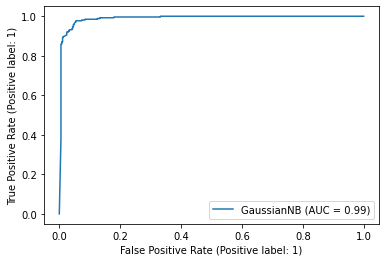

In [286]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train_Lsi, y_train)
P_gaussian = gaussian.predict(X_test_Lsi)

plot_roc_curve(gaussian, X_test_Lsi, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


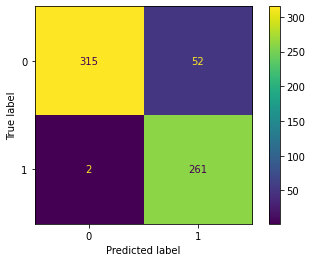

In [287]:
plot_confusion_matrix(gaussian, X_test_Lsi, y_test)

In [288]:
print('Gaussian Naive Bayes:')
print('-'*50)
print("Accuracy :", accuracy_score(y_test,P_gaussian))
print("Recall :", recall_score(y_test,P_gaussian))
print("Precision :", precision_score(y_test,P_gaussian))
print("F1-Score :", f1_score(y_test,P_gaussian))

Gaussian Naive Bayes:
--------------------------------------------------
Accuracy : 0.9142857142857143
Recall : 0.9923954372623575
Precision : 0.8338658146964856
F1-Score : 0.90625


## Q8

#### Grid Search of Parameters:

In [289]:
import string
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.svm import LinearSVC
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [290]:
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
    
    # lemmatization (same as the previous part)
def lemmatize_sent(sentences):
    wnl = nltk.wordnet.WordNetLemmatizer()
    words = len(sentences)*['']
    for i in range(len(sentences)):
        for item in sentences[i].split():
            words[i] = words[i] + ' ' + wnl.lemmatize(item)
    return words
    
    # stemming (same as the previous part)
def stemming_sent(sentences):
    ps = nltk.stem.PorterStemmer()
    words = len(sentences)*['']
    for i in range(len(sentences)):
        for item in sentences[i].split():
            words[i] = words[i] + ' ' + ps.stem(item)
    return words

def removes(list):
    list_new = []
    for item in list:
        if item not in string.punctuation and not item.isdigit(): # remove punctuation and numbers
            list_new.append(item)

    return list_new

def with_lemmatization(doc):
    words = lemmatize_sent(doc) # lemmatize
    words = removes(words)
    return words

def with_stemming(doc):
    words = stemming_sent(doc)
    words = removes(words)
    return words


**pipeline：**

![image.png](attachment:image.png)

In [97]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
            ('reduce_dim',None),
            ('classify',None)])
best_svm_gamma = 10
best_l1_gamma = 1000
best_l2_gamma = 10000

param_grid = {
    'vect__min_df': [3,5],
    'vect__analyzer': [with_lemmatization, with_stemming],
    'reduce_dim': [TruncatedSVD(n_components=5,random_state=42),
            TruncatedSVD(n_components=30,random_state=42),
            TruncatedSVD(n_components=80,random_state=42),
            NMF(n_components=5,init='random', random_state=42),
            NMF(n_components=30,init='random', random_state=42),
            NMF(n_components=80,init='random', random_state=42)],
    'classify': [LinearSVC(C=best_svm_gamma,random_state=42),
           LogisticRegression(penalty='l2',C=best_l2_gamma,random_state=42),
           LogisticRegression(penalty='l1',solver='liblinear',C=best_l1_gamma,random_state=42),
           GaussianNB()]
    } # parameter grid for the pipeline to find the best combination

grid = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# clean data
clean_train = []
for text in train['full_text']:
    clean_train.append(clean(text))


### Combination 1

In [102]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
            ('reduce_dim',None),
            ('classify',None)])
best_svm_gamma = 10
best_l1_gamma = 1000
best_l2_gamma = 10000

param_grid = {
    'vect__min_df': [3],
    'vect__analyzer': [with_lemmatization],
    'reduce_dim': [TruncatedSVD(n_components=5,random_state=42)],
    'classify': [LinearSVC(C=best_svm_gamma,random_state=42)],
    } # parameter grid for the pipeline to find the best combination

grid = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# clean data
clean_train = []
for text in train['full_text']:
    clean_train.append(clean(text))


In [103]:
grid.fit(clean_train, train['root_label'])
print("Best score for pipeline: ", grid.best_score_)
print("Best params for pipeline: ", grid.best_params_)
print("Best estimator for pipeline: ", grid.best_estimator_)



Best score for pipeline:  0.6281746031746032
Best params for pipeline:  {'classify': LinearSVC(C=10, random_state=42), 'reduce_dim': TruncatedSVD(n_components=5, random_state=42), 'vect__analyzer': <function with_lemmatization at 0x7f41f520f1f0>, 'vect__min_df': 3}
Best estimator for pipeline:  Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function with_lemmatization at 0x7f41f520f1f0>,
                                 min_df=3, stop_words='english')),
                ('reduce_dim', TruncatedSVD(n_components=5, random_state=42)),
                ('classify', LinearSVC(C=10, random_state=42))])


### Combination 2

In [104]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
            ('reduce_dim',None),
            ('classify',None)])
best_svm_gamma = 10
best_l1_gamma = 1000
best_l2_gamma = 10000

param_grid = {
    'vect__min_df': [5],
    'vect__analyzer': [with_lemmatization],
    'reduce_dim': [TruncatedSVD(n_components=30,random_state=42)],
    'classify': [LinearSVC(C=best_svm_gamma,random_state=42)],
    } # parameter grid for the pipeline to find the best combination

grid = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# clean data
clean_train = []
for text in train['full_text']:
    clean_train.append(clean(text))

grid.fit(clean_train, train['root_label'])
print("Best score for pipeline: ", grid.best_score_)
print("Best params for pipeline: ", grid.best_params_)
print("Best estimator for pipeline: ", grid.best_estimator_)



Best score for pipeline:  0.8150793650793651
Best params for pipeline:  {'classify': LinearSVC(C=10, random_state=42), 'reduce_dim': TruncatedSVD(n_components=30, random_state=42), 'vect__analyzer': <function with_lemmatization at 0x7f41f520f1f0>, 'vect__min_df': 5}
Best estimator for pipeline:  Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function with_lemmatization at 0x7f41f520f1f0>,
                                 min_df=5, stop_words='english')),
                ('reduce_dim', TruncatedSVD(n_components=30, random_state=42)),
                ('classify', LinearSVC(C=10, random_state=42))])


### Combination 3

In [105]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
            ('reduce_dim',None),
            ('classify',None)])
best_svm_gamma = 10
best_l1_gamma = 1000
best_l2_gamma = 10000

param_grid = {
    'vect__min_df': [5],
    'vect__analyzer': [with_lemmatization],
    'reduce_dim': [TruncatedSVD(n_components=5,random_state=42)],
    'classify': [LogisticRegression(penalty='l2',C=best_l2_gamma,random_state=42)],
    } # parameter grid for the pipeline to find the best combination

grid = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# clean data
clean_train = []
for text in train['full_text']:
    clean_train.append(clean(text))

grid.fit(clean_train, train['root_label'])
print("Best score for pipeline: ", grid.best_score_)
print("Best params for pipeline: ", grid.best_params_)
print("Best estimator for pipeline: ", grid.best_estimator_)



Best score for pipeline:  0.6313492063492063
Best params for pipeline:  {'classify': LogisticRegression(C=10000, random_state=42), 'reduce_dim': TruncatedSVD(n_components=5, random_state=42), 'vect__analyzer': <function with_lemmatization at 0x7f41f520f1f0>, 'vect__min_df': 5}
Best estimator for pipeline:  Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function with_lemmatization at 0x7f41f520f1f0>,
                                 min_df=5, stop_words='english')),
                ('reduce_dim', TruncatedSVD(n_components=5, random_state=42)),
                ('classify', LogisticRegression(C=10000, random_state=42))])


### Combination 4

In [106]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
            ('reduce_dim',None),
            ('classify',None)])
best_svm_gamma = 10
best_l1_gamma = 1000
best_l2_gamma = 10000

param_grid = {
    'vect__min_df': [3],
    'vect__analyzer': [with_lemmatization],
    'reduce_dim': [TruncatedSVD(n_components=50,random_state=42)],
    'classify': [LogisticRegression(penalty='l2',C=best_l2_gamma,random_state=42)],
    } # parameter grid for the pipeline to find the best combination

grid = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# clean data
clean_train = []
for text in train['full_text']:
    clean_train.append(clean(text))

grid.fit(clean_train, train['root_label'])
print("Best score for pipeline: ", grid.best_score_)
print("Best params for pipeline: ", grid.best_params_)
print("Best estimator for pipeline: ", grid.best_estimator_)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best score for pipeline:  0.8396825396825397
Best params for pipeline:  {'classify': LogisticRegression(C=10000, random_state=42), 'reduce_dim': TruncatedSVD(n_components=50, random_state=42), 'vect__analyzer': <function with_lemmatization at 0x7f41f520f1f0>, 'vect__min_df': 3}
Best estimator for pipeline:  Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function with_lemmatization at 0x7f41f520f1f0>,
                                 min_df=3, stop_words='english')),
                ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
                ('classify', LogisticRegression(C=10000, random_state=42))])


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Combination 5

In [109]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
            ('reduce_dim',None),
            ('classify',None)])
best_svm_gamma = 10
best_l1_gamma = 1000
best_l2_gamma = 10000

param_grid = {
    'vect__min_df': [5],
    'vect__analyzer': [with_lemmatization],
    'reduce_dim': [NMF(n_components=80,init='random', random_state=42)],
    'classify': [LinearSVC(C=best_svm_gamma,random_state=42)],
    } # parameter grid for the pipeline to find the best combination

grid = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# clean data
clean_train = []
for text in train['full_text']:
    clean_train.append(clean(text))

grid.fit(clean_train, train['root_label'])
print("Best score for pipeline: ", grid.best_score_)
print("Best params for pipeline: ", grid.best_params_)
print("Best estimator for pipeline: ", grid.best_estimator_)



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning:

Best score for pipeline:  0.826984126984127
Best params for pipeline:  {'classify': LinearSVC(C=10, random_state=42), 'reduce_dim': NMF(init='random', n_components=80, random_state=42), 'vect__analyzer': <function with_lemmatization at 0x7f41f520f1f0>, 'vect__min_df': 5}
Best estimator for pipeline:  Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function with_lemmatization at 0x7f41f520f1f0>,
                                 min_df=5, stop_words='english')),
                ('reduce_dim',
                 NMF(init='random', n_components=80, random_state=42)),
                ('classify', LinearSVC(C=10, random_state=42))])


### Multiclass Classification


## Q9

**Naive Bayes classification:**

In [291]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier  

In [292]:
map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",
                    4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",8:"drought"}
map_label = {"chess", "cricket", "hockey", "soccer", "football", 
             "%22forest%20fire%22", "flood", "earthquake", "drought"}

# clean data
train, test = train_test_split(dataset[['full_text','leaf_label']],test_size=0.2)
train_label = train['leaf_label']
test_label = test['leaf_label']

vectorizer_naive = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer_naive = TfidfTransformer()

train_naive = []
test_naive = []
for text in train['full_text']:
    train_naive.append(clean(text))
for text in test['full_text']:
    test_naive.append(clean(text))

In [293]:
# Dimension reduction
svd_naive = TruncatedSVD(n_components=50, random_state=42)
train_vec = vectorizer_naive.fit_transform(train_naive)
train_vec = tfidf_transformer_naive.fit_transform(train_vec)
train_Lsi = svd_naive.fit_transform(train_vec)

test_vec = vectorizer_naive.transform(test_naive)
test_vec = tfidf_transformer_naive.transform(test_vec)
test_Lsi = svd_naive.transform(test_vec)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


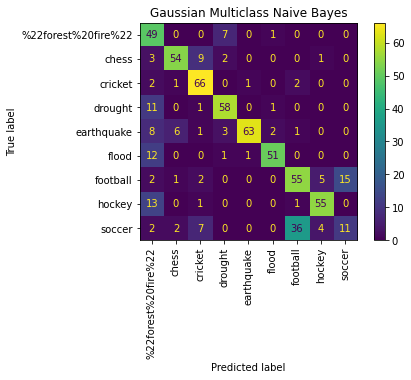

In [294]:
# Naive Bayes
Gau_NB = GaussianNB()
pred_nb = Gau_NB.fit(train_Lsi, train_label).predict(test_Lsi)

plot_confusion_matrix(Gau_NB, test_Lsi, test_label)
plt.xticks(rotation=90)
plt.title('Gaussian Multiclass Naive Bayes')
plt.show()

In [296]:
print("Accuracy of Gaussian Naive Bayes Method:", accuracy_score(test_label,pred_nb))
print("Recall of Gaussian Naive Bayes Method:", recall_score(test_label,pred_nb,average='weighted'))
print("Precision of Gaussian Naive Bayes Method:", precision_score(test_label,pred_nb,average='weighted'))
print("F1-Score of Gaussian Naive Bayes Method:", f1_score(test_label,pred_nb,average='weighted'))

Accuracy of Gaussian Naive Bayes Method: 0.7333333333333333
Recall of Gaussian Naive Bayes Method: 0.7333333333333333
Precision of Gaussian Naive Bayes Method: 0.7487098927296563
F1-Score of Gaussian Naive Bayes Method: 0.7270508633889835


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


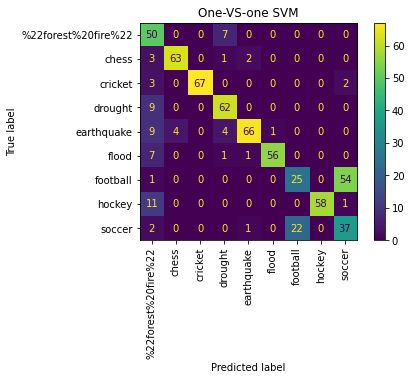

In [297]:
# multclass SVM OneVsOne
SVM_1v1 = OneVsOneClassifier(svm.SVC(random_state=42))
param_grid = {'estimator__C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'estimator__kernel': ['linear']}
grid_svm_1v1 = GridSearchCV(SVM_1v1,param_grid,cv=5,scoring='accuracy')
grid_svm_1v1.fit(train_Lsi,train_label)
pred_svm_1v1 =grid_svm_1v1.best_estimator_.predict(test_Lsi)

plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label)
# plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label,display_labels=map_label)
plt.xticks(rotation=90)
plt.title('One-VS-one SVM')
plt.show()

In [298]:
print("Accuracy of One-vs-one SVM:", accuracy_score(test_label,pred_svm_1v1))
print("Recall of One-vs-one SVM:", recall_score(test_label,pred_svm_1v1,average='weighted'))
print("Precision of One-vs-one SVM:", precision_score(test_label,pred_svm_1v1,average='weighted'))
print("F1-Score of One-vs-one SVM:", f1_score(test_label,pred_svm_1v1,average='weighted'))

Accuracy of One-vs-one SVM: 0.7682539682539683
Recall of One-vs-one SVM: 0.7682539682539683
Precision of One-vs-one SVM: 0.80252543853901
F1-Score of One-vs-one SVM: 0.7732600999105055


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


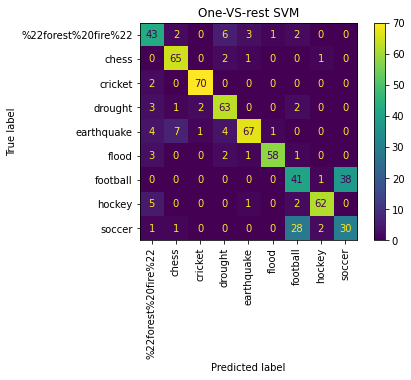

In [299]:
SVM_1vR = OneVsRestClassifier(svm.SVC(random_state=42))
param_grid = {'estimator__C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'estimator__kernel': ['linear']}
grid_svm_1vR = GridSearchCV(SVM_1vR,param_grid,cv=5,scoring='accuracy')
grid_svm_1vR.fit(train_Lsi,train_label)
pred_svm_1vR =grid_svm_1vR.best_estimator_.predict(test_Lsi)

plot_confusion_matrix(grid_svm_1vR.best_estimator_, test_Lsi, test_label)
# plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label,display_labels=map_label)
plt.xticks(rotation=90)
plt.title('One-VS-rest SVM')
plt.show()

In [300]:
print("Accuracy of One-vs-rest SVM:", accuracy_score(test_label,pred_svm_1vR))
print("Recall of One-vs-rest SVM:", recall_score(test_label,pred_svm_1vR,average='weighted'))
print("Precision of One-vs-rest SVM:", precision_score(test_label,pred_svm_1vR,average='weighted'))
print("F1-Score of One-vs-rest SVM:", f1_score(test_label,pred_svm_1vR,average='weighted'))

Accuracy of One-vs-rest SVM: 0.792063492063492
Recall of One-vs-rest SVM: 0.792063492063492
Precision of One-vs-rest SVM: 0.7976557558096669
F1-Score of One-vs-rest SVM: 0.7934477662960069


**merge football and soccer to ball**

In [332]:
map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",
                    4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",8:"drought"}
map_label = {"chess", "cricket", "hockey", "soccer", "football", 
             "%22forest%20fire%22", "flood", "earthquake", "drought"}

# clean data
train, test = train_test_split(dataset[['full_text','leaf_label']],test_size=0.2)
train = train.replace(to_replace = 'soccer', value = 'ball',regex = True)
train = train.replace(to_replace = 'football', value = 'ball',regex = True)
test = test.replace(to_replace = 'soccer', value = 'ball',regex = True)
test = test.replace(to_replace = 'football', value = 'ball',regex = True)

train_label = train['leaf_label']
test_label = test['leaf_label']

vectorizer_naive = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer_naive = TfidfTransformer()

train_naive = []
test_naive = []
for text in train['full_text']:
    train_naive.append(clean(text))
for text in test['full_text']:
    test_naive.append(clean(text))

svd_naive = TruncatedSVD(n_components=50, random_state=42)
train_vec = vectorizer_naive.fit_transform(train_naive)
train_vec = tfidf_transformer_naive.fit_transform(train_vec)
train_Lsi = svd_naive.fit_transform(train_vec)

test_vec = vectorizer_naive.transform(test_naive)
test_vec = tfidf_transformer_naive.transform(test_vec)
test_Lsi = svd_naive.transform(test_vec)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


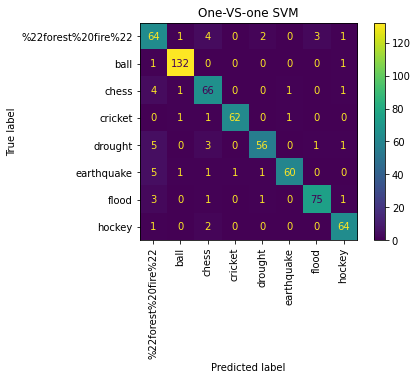

After merging inbalance:
Accuracy of One-vs-one SVM: 0.919047619047619
Recall of One-vs-one SVM: 0.919047619047619
Precision of One-vs-one SVM: 0.9222944267141833
F1-Score of One-vs-one SVM: 0.9197367182473644


In [333]:
# multclass SVM OneVsOne
SVM_1v1 = OneVsOneClassifier(svm.SVC(random_state=42))
param_grid = {'estimator__C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'estimator__kernel': ['linear']}
grid_svm_1v1 = GridSearchCV(SVM_1v1,param_grid,cv=5,scoring='accuracy')
grid_svm_1v1.fit(train_Lsi,train_label)
pred_svm_1v1 =grid_svm_1v1.best_estimator_.predict(test_Lsi)

plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label)
# plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label,display_labels=map_label)
plt.xticks(rotation=90)
plt.title('One-VS-one SVM')
plt.show()

print("After merging inbalance:")
print("Accuracy of One-vs-one SVM:", accuracy_score(test_label,pred_svm_1v1))
print("Recall of One-vs-one SVM:", recall_score(test_label,pred_svm_1v1,average='weighted'))
print("Precision of One-vs-one SVM:", precision_score(test_label,pred_svm_1v1,average='weighted'))
print("F1-Score of One-vs-one SVM:", f1_score(test_label,pred_svm_1v1,average='weighted'))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


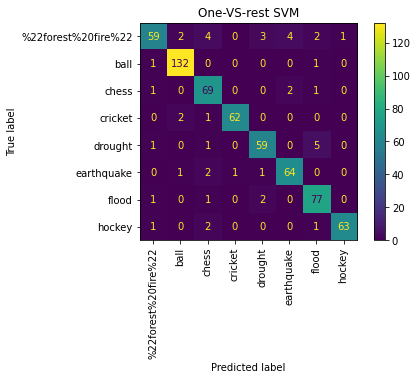

After merging inbalance:
Accuracy of One-vs-rest SVM: 0.9285714285714286
Recall of One-vs-rest SVM: 0.9285714285714286
Precision of One-vs-rest SVM: 0.92986834092884
F1-Score of One-vs-rest SVM: 0.9280990404871008


In [334]:
SVM_1vR = OneVsRestClassifier(svm.SVC(random_state=42))
param_grid = {'estimator__C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'estimator__kernel': ['linear']}
grid_svm_1vR = GridSearchCV(SVM_1vR,param_grid,cv=5,scoring='accuracy')
grid_svm_1vR.fit(train_Lsi,train_label)
pred_svm_1vR =grid_svm_1vR.best_estimator_.predict(test_Lsi)

plot_confusion_matrix(grid_svm_1vR.best_estimator_, test_Lsi, test_label)
# plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label,display_labels=map_label)
plt.xticks(rotation=90)
plt.title('One-VS-rest SVM')
plt.show()

print("After merging inbalance:")
print("Accuracy of One-vs-rest SVM:", accuracy_score(test_label,pred_svm_1vR))
print("Recall of One-vs-rest SVM:", recall_score(test_label,pred_svm_1vR,average='weighted'))
print("Precision of One-vs-rest SVM:", precision_score(test_label,pred_svm_1vR,average='weighted'))
print("F1-Score of One-vs-rest SVM:", f1_score(test_label,pred_svm_1vR,average='weighted'))

**Solve the class imbalanced after merging**


In [329]:
map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",
                    4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",8:"drought"}
map_label = {"chess", "cricket", "hockey", "soccer", "football", 
             "%22forest%20fire%22", "flood", "earthquake", "drought"}

# clean data
train, test = train_test_split(dataset[['full_text','leaf_label']],test_size=0.2)
train = train.replace(to_replace = 'football', value = 'ball',regex = True)
test = test.replace(to_replace = 'football', value = 'ball',regex = True)

ind = train[(train['leaf_label'] == 'soccer')].index
train = train.drop(ind)
ind = test[(test['leaf_label'] == 'soccer')].index
test = test.drop(ind)

train_label = train['leaf_label']
test_label = test['leaf_label']

vectorizer_naive = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer_naive = TfidfTransformer()

train_naive = []
test_naive = []
for text in train['full_text']:
    train_naive.append(clean(text))
for text in test['full_text']:
    test_naive.append(clean(text))

svd_naive = TruncatedSVD(n_components=50, random_state=42)
train_vec = vectorizer_naive.fit_transform(train_naive)
train_vec = tfidf_transformer_naive.fit_transform(train_vec)
train_Lsi = svd_naive.fit_transform(train_vec)

test_vec = vectorizer_naive.transform(test_naive)
test_vec = tfidf_transformer_naive.transform(test_vec)
test_Lsi = svd_naive.transform(test_vec)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


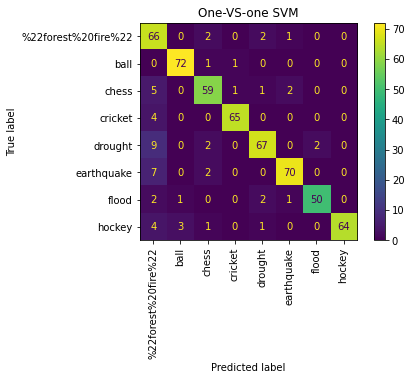

After merging inbalance:
Accuracy of One-vs-one SVM: 0.9
Recall of One-vs-one SVM: 0.9
Precision of One-vs-one SVM: 0.9126946984928569
F1-Score of One-vs-one SVM: 0.9028558004667697


In [330]:
# multclass SVM OneVsOne
SVM_1v1 = OneVsOneClassifier(svm.SVC(random_state=42))
param_grid = {'estimator__C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'estimator__kernel': ['linear']}
grid_svm_1v1 = GridSearchCV(SVM_1v1,param_grid,cv=5,scoring='accuracy')
grid_svm_1v1.fit(train_Lsi,train_label)
pred_svm_1v1 =grid_svm_1v1.best_estimator_.predict(test_Lsi)

plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label)
# plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label,display_labels=map_label)
plt.xticks(rotation=90)
plt.title('One-VS-one SVM')
plt.show()

print("After merging inbalance:")
print("Accuracy of One-vs-one SVM:", accuracy_score(test_label,pred_svm_1v1))
print("Recall of One-vs-one SVM:", recall_score(test_label,pred_svm_1v1,average='weighted'))
print("Precision of One-vs-one SVM:", precision_score(test_label,pred_svm_1v1,average='weighted'))
print("F1-Score of One-vs-one SVM:", f1_score(test_label,pred_svm_1v1,average='weighted'))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


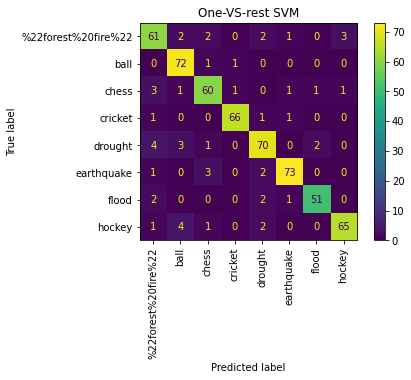

After merging inbalance:
Accuracy of One-vs-rest SVM: 0.9087719298245615
Recall of One-vs-rest SVM: 0.9087719298245615
Precision of One-vs-rest SVM: 0.9100248241948564
F1-Score of One-vs-rest SVM: 0.9089063676513645


In [331]:
SVM_1vR = OneVsRestClassifier(svm.SVC(random_state=42))
param_grid = {'estimator__C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'estimator__kernel': ['linear']}
grid_svm_1vR = GridSearchCV(SVM_1vR,param_grid,cv=5,scoring='accuracy')
grid_svm_1vR.fit(train_Lsi,train_label)
pred_svm_1vR =grid_svm_1vR.best_estimator_.predict(test_Lsi)

plot_confusion_matrix(grid_svm_1vR.best_estimator_, test_Lsi, test_label)
# plot_confusion_matrix(grid_svm_1v1.best_estimator_, test_Lsi, test_label,display_labels=map_label)
plt.xticks(rotation=90)
plt.title('One-VS-rest SVM')
plt.show()

print("After merging inbalance:")
print("Accuracy of One-vs-rest SVM:", accuracy_score(test_label,pred_svm_1vR))
print("Recall of One-vs-rest SVM:", recall_score(test_label,pred_svm_1vR,average='weighted'))
print("Precision of One-vs-rest SVM:", precision_score(test_label,pred_svm_1vR,average='weighted'))
print("F1-Score of One-vs-rest SVM:", f1_score(test_label,pred_svm_1vR,average='weighted'))

### Word Embedding 

## Q10

In [307]:
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r',encoding='UTF-8') as f: # if 'r' fails with unicode error, please use 'rb'
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))

6.1650367
5.966258
3.1520464


## Q11


In [308]:
# data
train, test = train_test_split(dataset[["full_text","root_label"]], test_size=0.2)
y_train = []
y_test = []

for item in train['root_label']:
  if item == 'sports':
    y_train.append(0)
  else:
    y_train.append(1)

for item in test['root_label']:
  if item == 'sports':
    y_test.append(0)
  else:
    y_test.append(1)

train_glove = []
for text in train['full_text']:
    train_glove.append(clean(text))

test_glove = []
for text in test['full_text']:
    test_glove.append(clean(text))

In [309]:
# we learnt from Eduardo Muñoz Sala to solve this problem 
# his website:
# https://edumunozsala.github.io/BlogEms/jupyter/nlp/classification/embeddings/python/2020/08/15/Intro_NLP_WordEmbeddings_Classification.html

class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)


In [310]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/ECE219/Project1'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ECE219/Project1


In [311]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec  import  glove2word2vec
# load the Stanford GloVe model
glove_filename='glove.6B.300d.txt'
word2vec_output_file = glove_filename+'.word2vec'
glove_path = '/content/gdrive/MyDrive/ECE219/Project1/' + glove_filename
glove2word2vec(glove_path,word2vec_output_file)

model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

vectorizer = Word2VecVectorizer(model)
Xtrain = vectorizer.fit_transform(train_glove)
Ytrain = y_train
Xtest = vectorizer.transform(test_glove)
Ytest = y_test

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],  
              'kernel': ['linear']}
Glove_svm = svm.SVC(random_state=42)
Glove_model = GridSearchCV(Glove_svm,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
Glove_model.fit(Xtrain, Ytrain)
y_pred_glove = Glove_model.best_estimator_.predict(Xtest)

print("Accuracy of GLoVE classifier:", accuracy_score(Ytest,y_pred_glove))
print("Recall of GLoVE classifier:", recall_score(Ytest,y_pred_glove))
print("Precision of GLoVE classifier:", precision_score(Ytest,y_pred_glove))
print("F1-Score of GLoVE classifier:", f1_score(Ytest,y_pred_glove))

Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 2520
Numer of samples with no words found: 0 / 630
Accuracy of GLoVE classifier: 0.9349206349206349
Recall of GLoVE classifier: 0.9304635761589404
Precision of GLoVE classifier: 0.9335548172757475
F1-Score of GLoVE classifier: 0.9320066334991709


## Q 12 
Using 4 set to check the relationship between accuracy and dimesion of Glove

In [313]:
filenames_glove = ['glove.6B.50d.txt','glove.6B.100d.txt','glove.6B.200d.txt','glove.6B.300d.txt']
accu_glove = []
for i in filenames_glove:
    print('Training for: ', i)
    word2vec_output_file = i+'.word2vec'
    glove_path = '/content/gdrive/MyDrive/ECE219/Project1/' + i
    glove2word2vec(glove_path, word2vec_output_file)

    model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    vectorizer = Word2VecVectorizer(model)
    Xtrain = vectorizer.fit_transform(train_glove)
    Ytrain = y_train
    Xtest = vectorizer.transform(test_glove)
    Ytest = y_test

    glove_4 = svm.SVC(kernel='linear',C=1,random_state=42)
    pred_cur = glove_4.fit(Xtrain, Ytrain).predict(Xtest)
    accu_glove.append(accuracy_score(Ytest,pred_cur))  

Training for:  glove.6B.50d.txt
Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 2520
Numer of samples with no words found: 0 / 630
Training for:  glove.6B.100d.txt
Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 2520
Numer of samples with no words found: 0 / 630
Training for:  glove.6B.200d.txt
Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 2520
Numer of samples with no words found: 0 / 630
Training for:  glove.6B.300d.txt
Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 2520
Numer of samples with no words found: 0 / 630


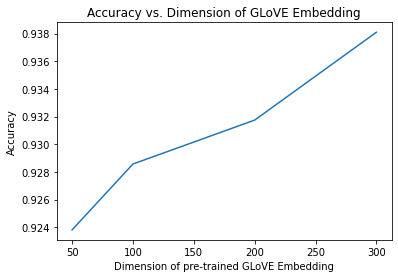

In [314]:
dim_list = [50,100,200,300]
plt.plot(dim_list,accu_glove)
plt.title('Accuracy vs. Dimension of GLoVE Embedding')
plt.xlabel('Dimension of pre-trained GLoVE Embedding')
plt.ylabel('Accuracy')
plt.show()

## Q13


In [315]:
!pip install umap-learn
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [316]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd
import umap.plot as up

In [317]:
import umap.umap_ as umap
reduced_dim_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(Xtrain)

YtrainTextLabel = []
for label in Ytrain:
    if(label==0):
      YtrainTextLabel.append('climate')
         
    else:
      YtrainTextLabel.append('sports')
        

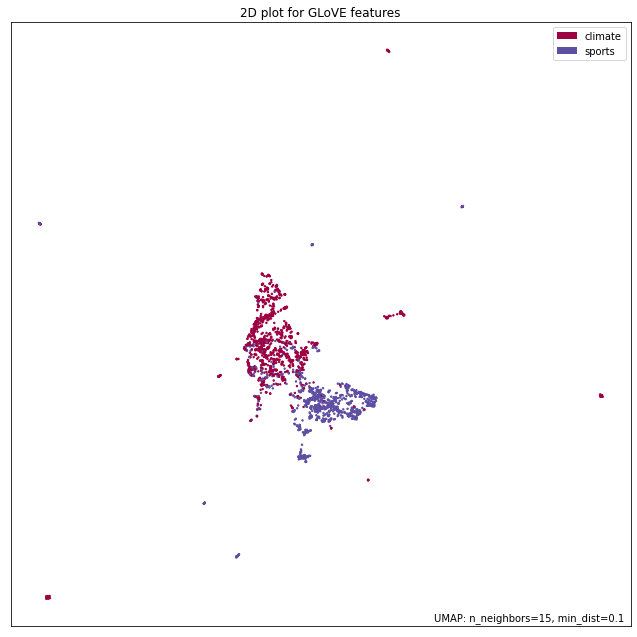

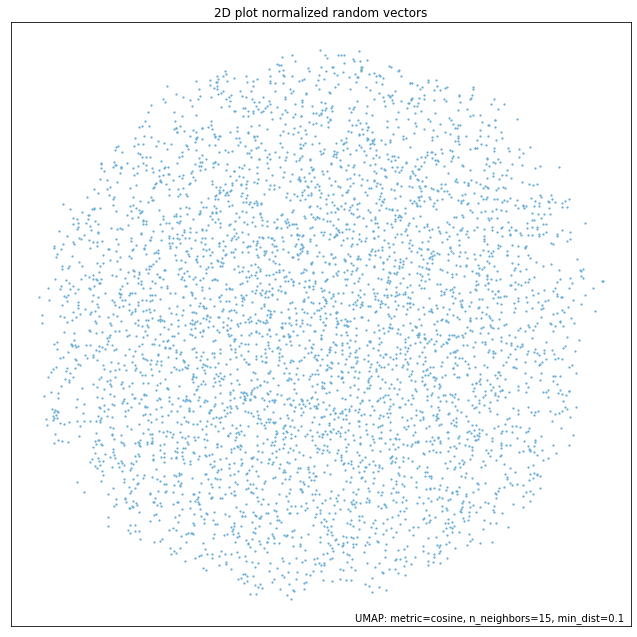

In [319]:
s = np.random.normal(0, 1, [4732,300])
s_norm = np.linalg.norm(s)
s = s / s_norm
reduced_dim_s = umap.UMAP(n_components=2, metric='cosine').fit(s)

g1 = up.points(reduced_dim_embedding, labels=np.array(YtrainTextLabel))
plt.title('2D plot for GLoVE features')
g2 = up.points(reduced_dim_s)
plt.title('2D plot normalized random vectors')
plt.show()